In [2]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [3]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NG_1.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,278.0
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135,0.0,0.135,0.000,0.000,3.537,NaN,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,NaN,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,0.000,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,NaN,0.0,1.160,0.000,0.000,3.121,15.0,103.0
4593,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,0.000,3.043,15.0,70.0
4594,NaN,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136,0.0,0.000,0.000,0.409,1.837,12.0,68.0
4595,0.17,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [4]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	35
float64		column 2	35
float64		column 3	55
float64		column 4	31
float64		column 5	30
float64		column 6	40
float64		column 7	60
float64		column 8	31
float64		column 9	40
float64		column 10	40
float64		column 11	45
float64		column 12	45
float64		column 13	55
float64		column 14	20
float64		column 15	20
float64		column 16	30
float64		column 17	45
float64		column 18	51
float64		column 19	25
float64		column 20	46
float64		column 21	40
float64		column 22	25
float64		column 23	41
float64		column 24	65
float64		column 25	61
float64		column 26	66
float64		column 27	15
float64		column 28	65
float64		column 29	35
float64		column 30	40
float64		column 31	25
float64		column 32	45
float64		column 33	35
float64		column 34	56
float64		column 35	25
float64		column 36	55
float64		column 37	36
float64		column 38	40
float64		column 39	40
float64		column 40	45
float64		column 41	35
float64		column 42	46
float64		column 43	40
float64		column 44	55
flo

In [5]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4562.000000,4562.000000,4542.000000,4566.000000,4567.000000,4557.000000,4537.000000,4566.000000,4557.000000,4557.000000,...,4582.000000,4547.000000,4567.000000,4562.000000,4561.000000,4547.000000,4567.000000,4551.000000,4562.000000,4572.000000
mean,0.104174,0.213764,0.277807,0.065926,0.312146,0.094654,0.113348,0.103863,0.088416,0.236691,...,0.031541,0.037482,0.138964,0.016915,0.268576,0.075097,0.043518,5.216885,52.084831,281.812336
std,0.305239,1.295612,0.499752,1.400478,0.673016,0.271705,0.390923,0.392766,0.273628,0.639391,...,0.285518,0.239194,0.270836,0.109603,0.817239,0.245527,0.429381,31.900285,194.489655,605.345436
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.590000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.278000,15.000000,95.000000
75%,0.000000,0.000000,0.410000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.000000,0.188000,0.000000,0.315000,0.051000,0.000000,3.714000,43.000000,264.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

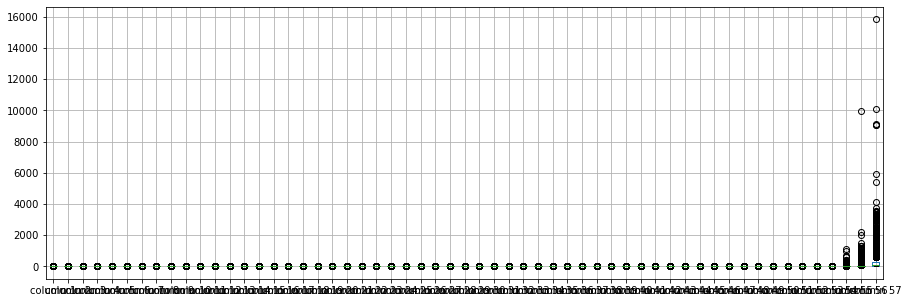

In [6]:
df.boxplot(return_type='axes', figsize=(15,5))

In [7]:
df.mean()

column 1       0.104174
column 2       0.213764
column 3       0.277807
column 4       0.065926
column 5       0.312146
column 6       0.094654
column 7       0.113348
column 8       0.103863
column 9       0.088416
column 10      0.236691
column 11      0.059664
column 12      0.542109
column 13      0.092574
column 14      0.058654
column 15      0.048884
column 16      0.248853
column 17      0.139833
column 18      0.183832
column 19      1.661282
column 20      0.083672
column 21      0.808154
column 22      0.117887
column 23      0.101229
column 24      0.090863
column 25      0.541151
column 26      0.261390
column 27      0.769775
column 28      0.122149
column 29      0.097269
column 30      0.102320
column 31      0.063904
column 32      0.046880
column 33      0.096673
column 34      0.047542
column 35      0.105951
column 36      0.094579
column 37      0.136713
column 38      0.011854
column 39      0.077678
column 40      0.064820
column 41      0.043623
column 42      0

In [8]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.016812,0.064857,0.013410,0.020066,0.058413,0.003647,-0.004162,0.109244,0.040338,...,-0.016929,-0.026258,-0.020049,-0.032640,0.054614,0.119699,-0.008511,0.044621,0.060487,0.087677
column 2,-0.016812,1.000000,-0.033095,-0.006977,-0.026137,-0.024489,0.003392,-0.016908,-0.002493,0.033837,...,-0.015478,-0.006410,-0.050397,-0.018263,-0.014353,-0.010894,0.002300,0.001938,0.000268,-0.022928
column 3,0.064857,-0.033095,1.000000,-0.020332,0.076766,0.087123,0.038502,0.013731,0.096663,0.032435,...,-0.026718,-0.034343,-0.015160,-0.034554,0.105947,0.086993,-0.003381,0.098363,0.107527,0.070995
column 4,0.013410,-0.006977,-0.020332,1.000000,0.003278,-0.009891,0.020092,0.010696,-0.002221,-0.004803,...,-0.001895,-0.000369,-0.012356,-0.007149,-0.003147,0.011080,-0.000237,0.005209,0.022234,0.021638
column 5,0.020066,-0.026137,0.076766,0.003278,1.000000,0.052363,0.145777,0.032209,0.021865,0.036808,...,-0.031531,-0.034625,-0.046137,-0.025503,0.024486,0.042941,0.002745,0.050917,0.051995,0.002202
column 6,0.058413,-0.024489,0.087123,-0.009891,0.052363,1.000000,0.059253,0.083505,0.128542,0.018468,...,-0.031242,-0.017780,-0.006623,-0.013455,0.061811,0.108328,0.018843,-0.010266,0.090848,0.083391
column 7,0.003647,0.003392,0.038502,0.020092,0.145777,0.059253,1.000000,0.047997,0.050963,0.058982,...,-0.030788,-0.031819,-0.050170,-0.026818,0.053858,0.068097,0.043963,0.041300,0.059770,-0.007303
column 8,-0.004162,-0.016908,0.013731,0.010696,0.032209,0.083505,0.047997,1.000000,0.089026,0.084897,...,-0.022575,-0.026964,-0.031354,-0.019881,0.033132,0.058649,-0.007396,0.012410,0.038175,0.040259
column 9,0.109244,-0.002493,0.096663,-0.002221,0.021865,0.128542,0.050963,0.089026,1.000000,0.133027,...,-0.025209,-0.012951,-0.029579,0.015230,0.043713,0.148806,-0.002901,0.112046,0.190218,0.247971
column 10,0.040338,0.033837,0.032435,-0.004803,0.036808,0.018468,0.058982,0.084897,0.133027,1.000000,...,-0.017860,0.013787,0.005009,0.006338,0.041382,0.076122,0.043655,0.073799,0.105010,0.088198


In [9]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [10]:
imputer = md.Midas(layer_structure = [17,17+24,17+24+24,17+24+24+24,17+24+24,17+24,17], vae_layer = False, seed = 240)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 678.9236287505785
Epoch: 1 , loss: 676.709578696859
Epoch: 2 , loss: 680.4092432214824
Epoch: 3 , loss: 675.7237427076811
Epoch: 4 , loss: 680.5931767586632
Epoch: 5 , loss: 667.4034096322408
Epoch: 6 , loss: 673.6405303636079
Epoch: 7 , loss: 675.4525132129417
Epoch: 8 , loss: 672.6909659249442
Epoch: 9 , loss: 672.4796144704785
Epoch: 10 , loss: 663.2152885676261
Epoch: 11 , loss: 647.4178148063633
Epoch: 12 , loss: 562.5707204200664
Epoch: 13 , loss: 534.9694762545596
Epoch: 14 , loss: 510.17432581672267
Epoch: 15 , loss: 512.7546276664069
Epoch: 16 , loss: 508.51906338469075
Epoch: 17 , loss: 484.0989293753062
Epoch: 18 , loss: 473.2312151015013
Epoch: 19 , loss: 473.8073610844097
Epoch: 20 , loss: 468.6804270461877
Epoch: 21 , loss: 486.19983255738583
Epoch: 22 , loss: 489.88613155245366
Epoch: 23 , loss: 487.3162521202805
Epoch: 24 , loss: 476.90643403588274
Epoch: 25 , loss: 473.19280014303916
E

In [11]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [12]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.00000
column 2      0.00000
column 3      0.00000
column 4      0.00000
column 5      0.00000
column 6      0.00000
column 7      0.00000
column 8      0.00000
column 9      0.00000
column 10     0.00000
column 11     0.00000
column 12     0.00000
column 13     0.00000
column 14     0.00000
column 15     0.00000
column 16     0.00000
column 17     0.00000
column 18     0.00000
column 19     0.00000
column 20    -0.01179
column 21     0.00000
column 22     0.00000
column 23     0.00000
column 24     0.00000
column 25     0.00000
column 26     0.00000
column 27     0.00000
column 28     0.00000
column 29     0.00000
column 30     0.00000
column 31     0.00000
column 32     0.00000
column 33     0.00000
column 34     0.00000
column 35     0.00000
column 36     0.00000
column 37     0.00000
column 38     0.00000
column 39     0.00000
column 40     0.00000
column 41     0.00000
column 42     0.00000
column 43     0.00000
column 44     0.00000
column 45     1.44000
column 46 

In [13]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [14]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,-38.266951,0.0
3,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000853,0.0,0.0,0.000000,0.0
4,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.335161,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4593,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4594,0.15041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4595,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


Calculating NRMSE Value

In [15]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [16]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [17]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

4647.267336738635

In [18]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [19]:
NRMS=numerator/denominator
NRMS


0.09792244354150594

In [20]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.261630
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.000000
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.440000
column 17      0.000000
column 18      0.890000
column 19      2.240000
column 20      0.000000
column 21      1.340000
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30      0.000000
column 31      0.000000
column 32      0.000000
column 33      0.000000
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.284312
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [21]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00000,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.0,0.778,0.000000,0.000,3.756,61.000000,278.0
1,0.21000,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.0,0.132000,0.0,0.372,0.180000,0.048,5.114,101.000000,1028.0
2,0.00000,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.0,0.135000,0.0,0.135,0.000000,0.000,3.537,1.733049,191.0
3,0.00000,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223000,0.0,0.000,0.000853,0.000,3.000,15.000000,54.0
4,0.00000,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054000,0.0,0.164,0.054000,0.000,1.671,4.000000,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00000,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.012839,0.0,1.160,0.000000,0.000,3.121,15.000000,103.0
4593,0.00000,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000000,0.0,0.000,0.000000,0.000,3.043,15.000000,70.0
4594,0.15041,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.136000,0.0,0.000,0.000000,0.409,1.837,12.000000,68.0
4595,0.17000,0.00,0.68,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032000,0.0,0.065,0.000000,0.000,1.189,5.000000,69.0


In [22]:
imputations[-1].to_excel("Spam_NG_1(imp).xlsx", index=False, header=False)